<a href="https://colab.research.google.com/github/JahnaviSinha/OPEN-CV-Project/blob/main/Freshness_Detection_from_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Failed Attempt


In [ ]:
%cd ..


/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: open dataset.zip
from google.colab import drive
drive.mount('/content/drive')
%cd /content
!rm -rf dataset

import zipfile

with zipfile.ZipFile('./drive/MyDrive/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

/content


In [ ]:
!rm -rf BananaDataset

In [ ]:
# import cv2
# import os
# import json
# import albumentations as A
# import numpy as np
# from glob import glob

# # Define augmentations
# transform = A.Compose([
#     A.HorizontalFlip(p=0.5),
#     A.VerticalFlip(p=0.2),
#     A.RandomBrightnessContrast(p=0.2),
#     A.Rotate(limit=30, p=0.5),
#     A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=15, p=0.5),
#     A.RandomResizedCrop(height=300, width=300, scale=(0.8, 1.0), p=0.5)
# ], bbox_params=A.BboxParams(format='coco',min_area=1024, min_visibility=0.1, label_fields=['category_ids']))

# # Define paths to images and labels
# image_dir = "dataset/content/dataset/images"
# label_dir = "dataset/content/dataset/labels"
# output_image_dir = "BananaDataset/images"
# output_label_dir = "BananaDataset/labels"

# os.makedirs(output_image_dir, exist_ok=True)
# os.makedirs(output_label_dir, exist_ok=True)

# # Load images and their labels
# image_files = glob(os.path.join(image_dir, "*.jpg"))
# for img_path in image_files:
#     # Read the image
#     img = cv2.imread(img_path)
#     img_name = os.path.basename(img_path).split('.')[0]

#     # Load corresponding label (YOLO format: class x_center y_center width height)
#     label_path = os.path.join(label_dir, img_name + ".txt")
#     img_height = img.shape[0]
#     img_width = img.shape[1]
#     with open(label_path, "r") as file:
#         boxes = []
#         category_ids = []
#         for line in file.readlines():
#             # print(line)
#             parts = line.strip().split()
#             category_ids.append(int(float(parts[4])))  # Class label
#             # print(int(float(parts[4])))
#             box = [float(parts[0]), float(parts[1]), float(parts[2]), float(parts[3])]
#             boxes.append(box)

#       # Apply augmentation

#     print(boxes)
#     augmented = transform(image=img, bboxes=boxes, category_ids=category_ids)
#     augmented_img = augmented['image']
#     augmented_bboxes = augmented['bboxes']
#     augmented_category_ids = augmented['category_ids']
#     # Save augmented image
#     output_img_path = os.path.join(output_image_dir, f"{img_name}_aug.jpg")
#     cv2.imwrite(output_img_path, augmented_img)
#     # Save augmented labels (YOLO format)
#     output_label_path = os.path.join(output_label_dir, f"{img_name}_aug.txt")
#     with open(output_label_path, "w") as out_file:
#         for bbox, category_id in zip(augmented_bboxes, augmented_category_ids):
#             bbox_str = " ".join([str(x) for x in bbox])
#             out_file.write(f"{category_id} {bbox_str}\n")
#     # except:
#     #    print(label_path)

# print("Data augmentation complete.")


[[110.7424, 116.56448, 732.5325, 351.96225]]
[[187.41582, 37.257042, 695.0464, 461.07892], [109.01888, 74.423164, 589.71655, 265.23468]]


ValueError: Expected x_max for bbox [0.21997161 0.07761884 1.0357537  1.0381999  0.        ] to be in the range [0.0, 1.0], got 1.0357537269592285.

In [ ]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.MobileNetV2(input_shape=(640, 640, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

<ipython-input-1-c07354da5aaa>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(640, 640, 3), include_top=False, weights='imagenet')


In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 89.0MB/s]


In [ ]:
num_classes = 101

In [ ]:
# x = base_model.output
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(128, activation='softmax')(x)
# x = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
# model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
import os
import torch
from PIL import Image

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, images_dir, labels_dir, transforms=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transforms = transforms
        self.image_files = [f for f in os.listdir(images_dir) if f.endswith(".jpg")]

    def load_label(self, label_file):
        with open(label_file) as f:
            # Assuming label.txt format: x_min, y_min, x_max, y_max, label (each on separate lines)
            lines = f.readlines()
            bbox = []
            label = []
            # print(lines)
            for line in lines:
              line = line.strip()
              tmp = line.split()[:4]
              tmp = [float(val) for val in tmp]
              # print(tmp)
              bbox.append(tmp)  # First four lines are the bounding box coordinates
              label.append(int(float(line.split()[4])))  # Fifth line is the class label

        # print(bbox)
        return bbox, label

    def __getitem__(self, idx):
        # Get image path
        image_file = self.image_files[idx]
        image_path = os.path.join(self.images_dir, image_file)

        # Load image
        img = Image.open(image_path).convert("RGB")

        # Load label (bounding box + class)
        label_file = os.path.join(self.labels_dir, image_file.replace(".jpg", ".txt"))
        bbox, label = self.load_label(label_file)

        if len(bbox) == 0:  # Handle images with no objects
            bbox = torch.zeros((0, 4), dtype=torch.float32)
            label = torch.zeros((0,), dtype=torch.int64)

        # Prepare target dictionary
        bbox = torch.tensor(bbox) # Add batch dimension
        label = torch.tensor(label)
        target = {
            "boxes": bbox,
            "labels": label
        }

        # Apply any transformations
        if self.transforms:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.image_files)


In [ ]:
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split  # Optional for more control over split
import os
from torchvision import transforms


# Paths to your dataset
images_dir = "./dataset/content/dataset/images"  # Directory containing images (e.g., "00001.jpg")
labels_dir = "./dataset/content/dataset/labels"  # Directory containing labels (e.g., "00001.txt")

transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to Tensor (which will have the `.shape` attribute)
])

# Initialize dataset
dataset = CustomDataset(images_dir, labels_dir)


train_size = int(0.8 * len(dataset))  # 80% training, 20% testing
test_size = len(dataset) - train_size

# Split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))



# DataLoader
# data_loader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))


In [ ]:


# for epoch in range(num_epochs):
#     model.train()  # Set the model to training mode

#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0

#     for images, labels in train_loader:
#         # Move images and labels to device (GPU or CPU)
#         images, labels = images.to(device), labels.to(device)

#         # Forward pass
#         loss_dict = model(images, labels)
#         losses = sum(loss for loss in loss_dict.values())
#         epoch_loss += losses.item()
#         optimizer.zero_grad()
#         losses.backward()
#         optimizer.step()

#         # Update running loss
#         running_loss += losses.item()

#         # Calculate accuracy
#         _, predicted = torch.max(loss_dict, 1)  # Get index of max log-probability (the predicted class)
#         correct_predictions += (predicted == labels).sum().item()  # Compare predictions to true labels
#         total_samples += labels.size(0)  # Keep track of the total number of samples

#     # Calculate and print the average loss and accuracy over the epoch
#     epoch_loss = running_loss / len(train_loader)
#     epoch_accuracy = correct_predictions / total_samples * 100

#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")


In [ ]:
# import torch
# import torch.nn as nn
# import torchvision.models as models

# # Load pre-trained MobileNetV2 model
# base_model = models.mobilenet_v2(pretrained=True)

# # Freeze the layers in the base model
# for param in base_model.parameters():
#     param.requires_grad = False

# # Define the custom object detection model
# class CustomMobileNetV2(nn.Module):
#     def __init__(self, num_classes):
#         super(CustomMobileNetV2, self).__init__()

#         # Use the base MobileNetV2 model (without the classifier layer)
#         self.base_model = base_model.features  # Extract features without the classifier

#         # Custom layers
#         self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))  # GlobalAveragePooling2D
#         self.fc1 = nn.Linear(1280, 128)  # 1280 is the output size of MobileNetV2 feature extractor
#         self.fc2 = nn.Linear(128, num_classes)  # Final classification layer

#     def forward(self, x):
#         # Pass through base model
#         x = self.base_model(x)

#         # Apply Global Average Pooling
#         x = self.global_avg_pool(x)
#         x = torch.flatten(x, 1)  # Flatten the tensor

#         # Pass through fully connected layers
#         x = self.fc1(x)
#         x = nn.functional.softmax(x, dim=1)  # Apply softmax activation (if needed here)
#         x = self.fc2(x)
#         return nn.functional.softmax(x, dim=1)  # Final output with softmax for num_classes

# # Instantiate the model
# num_classes = 101  # Example: for 10 classes
# model = CustomMobileNetV2(num_classes=num_classes)

# # Move the model to the appropriate device (CPU or GPU)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 96.9MB/s]


CustomMobileNetV2(
  (base_model): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(

In [ ]:
# import torch
# import torch.nn as nn
# import torchvision.models as models

# # Load pre-trained MobileNetV2 model
# base_model = models.mobilenet_v2(pretrained=True)

# # Freeze the layers in the base model
# for param in base_model.parameters():
#     param.requires_grad = False

# # Define the custom object detection model
# class CustomMobileNetV2(nn.Module):
#     def __init__(self, num_classes):
#         super(CustomMobileNetV2, self).__init__()

#         # Use the base MobileNetV2 model (without the classifier layer)
#         self.base_model = base_model.features  # Extract features without the classifier

#         # Custom layers for classification
#         self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))  # GlobalAveragePooling2D
#         self.fc1 = nn.Linear(1280, 128)  # 1280 is the output size of MobileNetV2 feature extractor
#         self.fc_class = nn.Linear(128, num_classes)  # Classification layer

#         # Custom layers for bounding box regression (4 coordinates: x_min, y_min, x_max, y_max)
#         self.fc_bbox = nn.Linear(128, 4)  # Bounding box regression layer

#     def forward(self, x):
#         # Pass through base model
#         x = self.base_model(x)

#         # Apply Global Average Pooling
#         x = self.global_avg_pool(x)
#         x = torch.flatten(x, 1)  # Flatten the tensor

#         # Pass through the fully connected layer
#         x = self.fc1(x)

#         # Classification output (softmax over num_classes)
#         class_logits = self.fc_class(x)
#         class_probs = nn.functional.softmax(class_logits, dim=1)

#         # Bounding box regression output (raw coordinates)
#         bbox_coords = self.fc_bbox(x)  # No activation, we want raw coordinates

#         # Output as a dictionary
#         output = {
#             'labels': class_probs,  # Predicted class probabilities
#             'boxes': bbox_coords   # Predicted bounding box coordinates
#         }

#         return output

# # Instantiate the model
# num_classes = 101  # Example: for 101 classes
# model = CustomMobileNetV2(num_classes=num_classes)

# # Move the model to the appropriate device (CPU or GPU)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)


CustomMobileNetV2(
  (base_model): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(

In [ ]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

In [ ]:
# def get_faster_rcnn_model(num_classes):
#     # Load a pre-trained Faster R-CNN model
#     model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

#     # Get the number of input features for the classifier
#     in_features = model.roi_heads.box_predictor.cls_score.in_features

#     # Replace the pre-trained box predictor with a new one (for 101 classes)
#     model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

#     return model


In [ ]:
import torch

# Load the YOLOv5 model (you can specify a different version)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # 'yolov5s' is the smallest model


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 224.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.3s, installed 1 package: ['gitpython>=3.1.30']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-10-14 Python-3.10.12 torch-2.4.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 94.1MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
num_classes = 101  # Specify the number of classes you want to train on
# model.model[-1] = torch.nn.Linear(in_features=model.model[-1].in_features, out_features=num_classes)
# model.model[-1] = torch.nn.Sequential(
#     torch.nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),  # Change channels as necessary
#     torch.nn.BatchNorm2d(1024),
#     torch.nn.ReLU(inplace=True),
#     torch.nn.Conv2d(1024, num_classes * (5 + 1), kernel_size=1)  # 5 for bbox coords + 1 for objectness score
# )

model.model[-1].nc = num_classes  # Set the number of classes
model.model[-1].grid = [1, 1]  # Set the grid size
model.model[-1].stride = [8, 16, 32]  # Set the stride

# This also modifies the output layer to accommodate the new number of classes
model.model[-1].forward = lambda x: model.model[-1].detect(x, num_classes=num_classes)

TypeError: 'DetectMultiBackend' object is not subscriptable

In [ ]:
num_classes = 101
# model = get_faster_rcnn_model(num_classes)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms

# Define the transformation: Convert image to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize as per ImageNet standards
])


num_epochs = 10
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

# Define loss functions: Classification and Bounding Box Regression loss
classification_loss_fn = nn.CrossEntropyLoss()  # For class prediction
bbox_loss_fn = nn.SmoothL1Loss()  # For bounding box regression

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

def calculate_iou(pred_box, true_box):
    """Calculate Intersection over Union (IoU) for two bounding boxes."""
    # Intersection
    x1 = torch.max(pred_box[0], true_box[0])
    y1 = torch.max(pred_box[1], true_box[1])
    x2 = torch.min(pred_box[2], true_box[2])
    y2 = torch.min(pred_box[3], true_box[3])

    intersection = (x2 - x1).clamp(0) * (y2 - y1).clamp(0)

    # Union
    pred_box_area = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])
    true_box_area = (true_box[2] - true_box[0]) * (true_box[3] - true_box[1])

    union = pred_box_area + true_box_area - intersection

    return intersection / union  # IoU

# Training Loop
num_epochs = 10
iou_threshold = 0.5  # IoU threshold for a positive detection

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_detections = 0
    total_detections = 0

    for images, targets in train_loader:  # targets contain ground-truth boxes and labels
        nw_images = []
        for image in images:
          nw_images.append(transform(image))
        images = torch.stack(nw_images)
        images = images.to(device)
        true_boxes = []
        true_labels = []
        for target in targets:
          true_boxes.append(target['boxes'])
          true_labels.append(target['labels'])

        # Forward pass: Get model outputs (predicted boxes and labels)
        outputs = model(images, targets)
        # print(outputs)
        print(outputs)
        # pred_boxes = outputs['boxes']  # Predicted bounding boxes
        # pred_labels = outputs['labels']  # Predicted class labels


        # # Compute the losses
        # print(pred_labels)
        # print(true_labels)
        true_labels = torch.tensor(true_labels)
        classification_loss = classification_loss_fn(outputs, true_labels)
        bbox_loss = bbox_loss_fn(pred_boxes, true_boxes)
        loss = classification_loss + bbox_loss

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

        # Calculate accuracy (IoU for bounding boxes + correct class labels)
        for i in range(len(pred_boxes)):
            iou = calculate_iou(pred_boxes[i], true_boxes[i])
            if iou > iou_threshold and pred_labels[i] == true_labels[i]:
                correct_detections += 1
            total_detections += 1

    # Calculate accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_detections / total_detections * 100

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

{'loss_classifier': tensor(5.6009, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.0902, grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.6491, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.0131, grad_fn=<DivBackward0>)}


KeyError: 'boxes'

In [ ]:
# model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001, momentum=0.9)
# num_epochs = 10
# for epoch in range(num_epochs):
#     train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
#     evaluate(model, val_data_loader, device=device)


In [ ]:
# import torch.optim as optim
# from torchvision import transforms
# # from tensorflow import tensor

# device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# model.to(device)

# # Optimizer
# optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# # Training loop
# num_epochs = 10
# for epoch in range(num_epochs):
#     model.train()
#     epoch_loss = 0
#     ind = 0
#     for images, targets in data_loader:
#         ind += 1
#         print(f"\r{ind}", end = " ")
#         # Move images and targets to the device
#         transform_img = transforms.ToTensor()
#         images = [transform_img(image) for image in images]
#         images = [image.to(device) for image in images]
#         targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

#         # Forward pass
#         # try:
#         loss_dict = model(images, targets)
#         # except:
#           # print("error here")
#           # print(t
#           # argets)
#         losses = sum(loss for loss in loss_dict.values())
#         epoch_loss += losses.item()
#         optimizer.zero_grad()
#         losses.backward()
#         optimizer.step()

#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}")

<ipython-input-6-f783b9bfc5ac>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bbox = torch.tensor(bbox) # Add batch dimension
<ipython-input-6-f783b9bfc5ac>:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(label)


265 Epoch 1/10, Loss: 108.766849771142
265 Epoch 2/10, Loss: 84.4751948416233
265 Epoch 3/10, Loss: 82.1581207960844
265 Epoch 4/10, Loss: 80.10447876155376
265 Epoch 5/10, Loss: 78.25940227508545
265 Epoch 6/10, Loss: 76.5566526055336
265 Epoch 7/10, Loss: 75.00724294781685
265 Epoch 8/10, Loss: 73.51334337890148
265 Epoch 9/10, Loss: 72.20919878780842
265 Epoch 10/10, Loss: 70.98607276380062


In [ ]:
import torchvision.transforms as T

def predict(image_path, model, device):
    img = Image.open(image_path).convert("RGB")
    transform = T.Compose([T.ToTensor()])
    img = transform(img).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        prediction = model(img)

    return prediction

# Example usage
image_path = "00368.jpg"
prediction = predict(image_path, model, device)
print(prediction)

[{'boxes': tensor([], device='cuda:0', size=(0, 4)), 'labels': tensor([], device='cuda:0', dtype=torch.int64), 'scores': tensor([], device='cuda:0')}]


## Use custom loss function for YOLO

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17018, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 17018 (delta 120), reused 124 (delta 68), pack-reused 16805 (from 1)
Receiving objects: 100% (17018/17018), 15.73 MiB | 16.49 MiB/s, done.
Resolving deltas: 100% (11658/11658), done.
/content/yolov5/yolov5


#Training Using Yolov5
<h4>Got 78% Accuracy on validation data</h4>

Making Dataset can be found here <a href = "https://colab.research.google.com/drive/15FtEX7KZKMFYcEL2j-oQxkRzXN5FMKab?usp=sharing"> Data set making </a>

Dataset Link -> <a href = "https://kaggle.com/datasets/4d7867c977ade80c49e3104422db67249afc986be092eddb605687eea0221ae3"> Banana_Freshness_Data </a>extract the dataset folder there and upload here for training


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content
!rm -rf dataset

import zipfile

with zipfile.ZipFile('./drive/MyDrive/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

/content


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 17075 (delta 29), reused 30 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17075/17075), 15.69 MiB | 24.16 MiB/s, done.
Resolving deltas: 100% (11723/11723), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 18.2 MB/s eta 0:00:00


In [ ]:
!rm -rf yolo_dataset

###Spilt Data into Training and Testing

In [ ]:
import os
import shutil

%cd /content

# Directories
image_dir = './dataset/content/dataset/images'
label_dir = './dataset/content/dataset/labels'
train_image_dir = './yolo_dataset/train/images'
train_label_dir = './yolo_dataset/train/labels'
val_image_dir = './yolo_dataset/val/images'
val_label_dir = './yolo_dataset/val/labels'

# Create directories if they don't exist
os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# Get sorted list of all images
images = sorted(os.listdir(image_dir))

# Set indices for validation range
val_start_index = 490
val_end_index = 960

# Split images into training and validation sets
val_images = images[val_start_index:val_end_index]
train_images = images[:val_start_index] + images[val_end_index:]

# Move train files
for ind, img in enumerate(train_images, start=1):
    print(f"\rProcessing train image {ind}/{len(train_images)}", end="")
    img_path = os.path.join(image_dir, img)
    label_path = os.path.join(label_dir, img.replace('.jpg', '.txt'))

    shutil.copy(img_path, train_image_dir)
    shutil.copy(label_path, train_label_dir)

# Move validation files
for ind, img in enumerate(val_images, start=1):
    print(f"\rProcessing val image {ind}/{len(val_images)}", end="")
    img_path = os.path.join(image_dir, img)
    label_path = os.path.join(label_dir, img.replace('.jpg', '.txt'))

    shutil.copy(img_path, val_image_dir)
    shutil.copy(label_path, val_label_dir)

print("\nDataset split into train and val sets.")


/content
Processing val image 470/470
Dataset split into train and val sets.


In [ ]:
import os

# Function to round to nearest multiple of 5
def round_to_nearest_five(num):
    return 5 * round(num / 5)

# Directories containing labels
label_dirs = ['./yolo_dataset/val/labels', './yolo_dataset/train/labels']

for label_dir in label_dirs:
    for label_file in os.listdir(label_dir):
        file_path = os.path.join(label_dir, label_file)

        # Read each label file
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Process each line
        new_lines = []
        for line in lines:
            values = line.strip().split()
            if len(values) == 5:
                # Extract YOLO formatted data: class, x_center, y_center, width, height
                yolo_class = int(float(values[4]))  # class label
                bbox = values[0:4]  # x_center, y_center, width, height

                # Round the class label to nearest multiple of 5
                rounded_class = round_to_nearest_five(yolo_class)

                # Recreate the line with the updated class label
                new_line = f'{rounded_class} ' + ' '.join(bbox) + '\n'
                new_lines.append(new_line)
                # print(new_line)

        # Write the updated lines back to the file
        with open(file_path, 'w') as file:
            file.writelines(new_lines)

print("YOLO labels updated successfully!")


YOLO labels updated successfully!


In [ ]:
import os

# Mapping from original class labels to new class numbers
label_mapping = {
    0: 0,
    5: 1,
    10: 2,
    15: 3,
    20: 4,
    25: 5,
    30: 6,
    35: 7,
    40: 8,
    45: 9,
    50: 10,
    55: 11,
    60: 12,
    65: 13,
    70: 14,
    75: 15,
    80: 16,
    85: 17,
    90: 18,
    95: 19,
    100: 20
}

%cd /content
# Directories containing labels
label_dirs = ['./yolo_dataset/val/labels', './yolo_dataset/train/labels']

for label_dir in label_dirs:
    for label_file in os.listdir(label_dir):
        file_path = os.path.join(label_dir, label_file)

        # Read each label file
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Process each line
        new_lines = []
        for line in lines:
            values = line.strip().split()
            if len(values) == 5:
                # Extract class and bounding box values
                original_class = int(values[0])  # class label
                bbox = values[1:5]  # x_center, y_center, width, height

                # Map the original class to the new class number
                new_class = label_mapping.get(original_class, original_class)  # default to original if not in mapping

                # Recreate the line with the updated class label
                new_line = f'{new_class} ' + ' '.join(bbox) + '\n'
                new_lines.append(new_line)

        # Write the updated lines back to the file
        with open(file_path, 'w') as file:
            file.writelines(new_lines)

print("Labels updated successfully with new class numbers!")


/content
Labels updated successfully with new class numbers!


/content/yolov5


In [ ]:
import yaml

# Define the structure of the custom dataset YAML
data = {
    'train': '/content/yolo_dataset/train',
    'val': '/content/yolo_dataset/val',
    'nc': 21,
    'names': {i: i * 5 for i in range(21)}
}

# Write the structure to a YAML file
with open('custom.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("custom.yaml file created successfully!")


custom.yaml file created successfully!


In [ ]:
# import cv2
# %cd /content
# path = "./yolo_dataset/train/images"
# for i in os.listdir(path):
#   img = cv2.imread(os.path.join(path, i))
#   height, width, channels = img.shape

#   print(f"Width: {width}, Height: {height}, Channels: {channels}")
  # print(img.size)

In [ ]:
# !pip install -q albumentations

In [ ]:
from __future__ import annotations
import albumentations as A
from pathlib import Path

from typing import NamedTuple
from typing import Optional

from PIL import Image

import gdown
import numpy as np
import matplotlib.pyplot as plt

import cv2
import albumentations as A

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
!pip install -U albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [ ]:
from PIL import Image

%cd /content
img_temp = "./yolo_dataset/train/images/00001.jpg"
img_temp = Image.open(img_temp)
print(img_temp.size)

/content
(852, 480)


In [ ]:
import os

%cd /content
# Function to convert labels
def convert_labels(input_file, output_file, image_width, image_height):
    with open(input_file, 'r') as f_in, open(output_file, 'w') as f_out:
        for line in f_in:
            # Split the line into class_id and bounding box coordinates
            class_id, x_min, y_min, x_max, y_max = map(float, line.split())

            # Calculate the center coordinates, width, and height
            x_center = (x_min + x_max) / 2 / image_width
            y_center = (y_min + y_max) / 2 / image_height
            width = (x_max - x_min) / image_width
            height = (y_max - y_min) / image_height

            # Write the new label in the format: class_id x_center y_center width height
            f_out.write(f"{int(class_id)} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")
            # print("Written")
# Path to your dataset and label files

image_width = 852 # Replace with the actual width of your images
image_height = 480  # Replace with the actual height of your images

dir = ['/content/yolo_dataset/train', '/content/yolo_dataset/val']
# Convert all labels in the directory
for path in dir:
  input_label_path = 'labels'
  output_label_path = 'labels_new'
  input_label_path = os.path.join(path, input_label_path)
  output_label_path = os.path.join(path, output_label_path)
  os.makedirs(output_label_path, exist_ok=True)
  for label_file in os.listdir(input_label_path):
      # print("Hello")
      input_file = os.path.join(input_label_path, label_file)
      output_file = os.path.join(output_label_path, label_file)

      convert_labels(input_file, output_file, image_width, image_height)

print("Conversion completed!")


/content
Conversion completed!


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model (pre-trained weights can be used or custom ones)
model = YOLO('yolov8n.pt')  # Replace 'yolov8n.pt' with the desired YOLOv8 model variant

# Train the model using the custom dataset
model.train(data='custom.yaml', epochs=50, imgsz=640, batch=16, device=0, augment=True)

# Save the model
print("Training completed! Model weights are saved in the 'runs/train' directory.")


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=custom.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

train: Scanning /content/yolo_dataset/train/labels.cache... 1647 images, 128 backgrounds, 0 corrupt: 100%|██████████| 1647/1647 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/yolo_dataset/val/labels.cache... 470 images, 0 backgrounds, 0 corrupt: 100%|██████████| 470/470 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.01G     0.6207      3.768       1.17         53        640: 100%|██████████| 103/103 [00:34<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.81it/s]

                   all        470        794     0.0395       0.74      0.132     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.01G     0.5439      3.065      1.093         48        640: 100%|██████████| 103/103 [00:32<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.82it/s]

                   all        470        794      0.363      0.277      0.178      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         4G     0.5089      2.608      1.049         52        640: 100%|██████████| 103/103 [00:31<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.48it/s]

                   all        470        794      0.154      0.306      0.163      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.02G     0.4735      2.363      1.014         46        640: 100%|██████████| 103/103 [00:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.86it/s]

                   all        470        794      0.237      0.484      0.226      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         4G     0.4494      2.211     0.9942         50        640: 100%|██████████| 103/103 [00:33<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.20it/s]

                   all        470        794      0.142      0.271      0.117     0.0829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         4G     0.4125      2.068     0.9793         43        640: 100%|██████████| 103/103 [00:33<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.66it/s]

                   all        470        794      0.186      0.367      0.258      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         4G      0.403      1.993     0.9719         36        640: 100%|██████████| 103/103 [00:33<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]


                   all        470        794      0.178      0.391      0.236      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         4G     0.3865      1.924      0.967         60        640: 100%|██████████| 103/103 [00:34<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]


                   all        470        794      0.241      0.528      0.244       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         4G     0.3703      1.817     0.9518         42        640: 100%|██████████| 103/103 [00:33<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.62it/s]

                   all        470        794      0.147      0.347      0.197      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         4G     0.3567      1.763     0.9442         51        640: 100%|██████████| 103/103 [00:32<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.70it/s]

                   all        470        794      0.107      0.349      0.173      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         4G     0.3417      1.721       0.94         52        640: 100%|██████████| 103/103 [00:34<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.59it/s]

                   all        470        794      0.246      0.341      0.164      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         4G     0.3458      1.674     0.9424         52        640: 100%|██████████| 103/103 [00:34<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.77it/s]


                   all        470        794      0.162      0.449      0.254      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         4G     0.3264      1.636     0.9293         45        640: 100%|██████████| 103/103 [00:33<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.79it/s]


                   all        470        794      0.245      0.349      0.252      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         4G      0.327      1.645     0.9324         44        640: 100%|██████████| 103/103 [00:33<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.44it/s]


                   all        470        794      0.208      0.399      0.227       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.02G     0.3216      1.575     0.9325         50        640: 100%|██████████| 103/103 [00:33<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.60it/s]


                   all        470        794      0.244       0.22       0.25      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         4G     0.3004      1.505     0.9201         35        640: 100%|██████████| 103/103 [00:33<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.69it/s]

                   all        470        794      0.271      0.457       0.34      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         4G     0.2995      1.514     0.9208         51        640: 100%|██████████| 103/103 [00:34<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]


                   all        470        794      0.207      0.422      0.238      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.02G     0.2953      1.468     0.9163         61        640: 100%|██████████| 103/103 [00:33<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]

                   all        470        794      0.208      0.472      0.302       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         4G     0.2913       1.45     0.9129         53        640: 100%|██████████| 103/103 [00:33<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.46it/s]


                   all        470        794      0.325      0.511      0.368      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.02G     0.2889      1.425     0.9145         51        640: 100%|██████████| 103/103 [00:33<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.86it/s]


                   all        470        794      0.279        0.5      0.271      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         4G     0.2805      1.388     0.9102         57        640: 100%|██████████| 103/103 [00:32<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.59it/s]


                   all        470        794      0.279       0.51      0.354      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         4G     0.2884      1.423     0.9104         46        640: 100%|██████████| 103/103 [00:32<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]


                   all        470        794      0.163       0.44      0.273      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         4G     0.2702      1.361     0.9059         52        640: 100%|██████████| 103/103 [00:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.57it/s]

                   all        470        794      0.349      0.467       0.32      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         4G     0.2725      1.327     0.9082         51        640: 100%|██████████| 103/103 [00:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.51it/s]

                   all        470        794      0.264      0.431      0.308      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.02G     0.2669      1.316      0.905         54        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.46it/s]

                   all        470        794      0.203      0.349      0.281      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         4G     0.2663      1.299     0.9028         41        640: 100%|██████████| 103/103 [00:30<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.49it/s]

                   all        470        794      0.304      0.412      0.258      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         4G     0.2626      1.259     0.9014         42        640: 100%|██████████| 103/103 [00:31<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.52it/s]

                   all        470        794      0.292      0.378       0.29      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.01G     0.2541      1.257     0.9006         46        640: 100%|██████████| 103/103 [00:33<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.52it/s]

                   all        470        794      0.197      0.437      0.299      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         4G     0.2581      1.241     0.9007         48        640: 100%|██████████| 103/103 [00:30<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.56it/s]


                   all        470        794       0.22      0.391      0.309      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.02G     0.2447       1.21     0.8917         38        640: 100%|██████████| 103/103 [00:31<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.22it/s]


                   all        470        794      0.242      0.473      0.279      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         4G     0.2499      1.215     0.8998         39        640: 100%|██████████| 103/103 [00:33<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.66it/s]

                   all        470        794      0.167      0.384      0.261      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         4G     0.2457      1.202     0.8992         35        640: 100%|██████████| 103/103 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]

                   all        470        794      0.305      0.377      0.228       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         4G     0.2418      1.164     0.8972         48        640: 100%|██████████| 103/103 [00:31<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.95it/s]


                   all        470        794      0.348      0.422       0.29       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         4G     0.2397      1.161     0.8949         36        640: 100%|██████████| 103/103 [00:31<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.19it/s]

                   all        470        794      0.356      0.437      0.285      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         4G     0.2335      1.151     0.8873         39        640: 100%|██████████| 103/103 [00:32<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]

                   all        470        794      0.197      0.398      0.252      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         4G     0.2314      1.108     0.8891         49        640: 100%|██████████| 103/103 [00:31<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.51it/s]

                   all        470        794      0.312      0.451      0.268      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.01G     0.2309      1.126     0.8912         42        640: 100%|██████████| 103/103 [00:31<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.55it/s]

                   all        470        794      0.326      0.508      0.331      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         4G     0.2298      1.118     0.8917         58        640: 100%|██████████| 103/103 [00:30<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.66it/s]

                   all        470        794      0.237      0.419      0.297      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         4G     0.2191      1.088     0.8845         42        640: 100%|██████████| 103/103 [00:30<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.80it/s]

                   all        470        794      0.319      0.472      0.292        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         4G     0.2195      1.081     0.8894         46        640: 100%|██████████| 103/103 [00:31<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.26it/s]

                   all        470        794      0.332      0.508      0.322      0.211


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         4G     0.1942      1.162     0.8587         23        640: 100%|██████████| 103/103 [00:32<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.67it/s]

                   all        470        794      0.308       0.41      0.281      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.99G     0.1775      1.051      0.842         18        640: 100%|██████████| 103/103 [00:29<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.19it/s]

                   all        470        794      0.192      0.342      0.256      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.99G     0.1799      1.006     0.8519         19        640: 100%|██████████| 103/103 [00:30<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.94it/s]

                   all        470        794      0.301        0.4      0.273      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.99G     0.1736     0.9754      0.846         13        640: 100%|██████████| 103/103 [00:31<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.88it/s]

                   all        470        794      0.367      0.497      0.325      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.99G      0.169     0.9536     0.8367         16        640: 100%|██████████| 103/103 [00:33<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]

                   all        470        794      0.273      0.389      0.268      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.99G     0.1618     0.9448     0.8403         17        640: 100%|██████████| 103/103 [00:32<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.78it/s]


                   all        470        794      0.302      0.381      0.256      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.99G     0.1615        0.9     0.8401         17        640: 100%|██████████| 103/103 [00:31<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.12it/s]

                   all        470        794      0.345      0.395      0.301      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.99G     0.1593     0.8891     0.8382         19        640: 100%|██████████| 103/103 [00:30<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.46it/s]

                   all        470        794      0.275      0.412      0.299      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.99G     0.1568     0.8934     0.8384         17        640: 100%|██████████| 103/103 [00:29<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.70it/s]

                   all        470        794      0.336       0.44      0.299       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.99G     0.1559     0.8716     0.8387         14        640: 100%|██████████| 103/103 [00:29<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]

                   all        470        794      0.306      0.399      0.305      0.221



50 epochs completed in 0.524 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,009,743 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.67it/s]


                   all        470        794      0.212      0.516      0.324       0.24
                     0         16         24      0.321      0.625      0.539       0.35
                     5         21         27      0.125          1      0.345      0.209
                    10         22         22      0.112          1      0.155      0.105
                    15         22         34          0          0      0.143      0.117
                    20         22         44          0          0      0.129      0.108
                    25         22         43          0          0      0.114     0.0816
                    30         21         42      0.129      0.286      0.117     0.0903
                    35         22         46      0.224      0.478      0.163      0.104
                    40         22         54      0.172      0.444       0.17     0.0985
                    45         22         60      0.178      0.217      0.173        0.1
                    5

In [ ]:
model.save('best_for_freshness.pt')

#Testing the Model

The model can be found here <a href = "https://drive.google.com/file/d/1HyNZQhrj7teMomC_sWvDNrOrKm527jdN/view?usp=sharing">best_for_freshness.pt</a> download and upload it here.

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 22.1 MB/s eta 0:00:00


(2048, 2048)
(854, 480)

0: 384x640 1 65, 126.8ms
Speed: 5.5ms preprocess, 126.8ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)


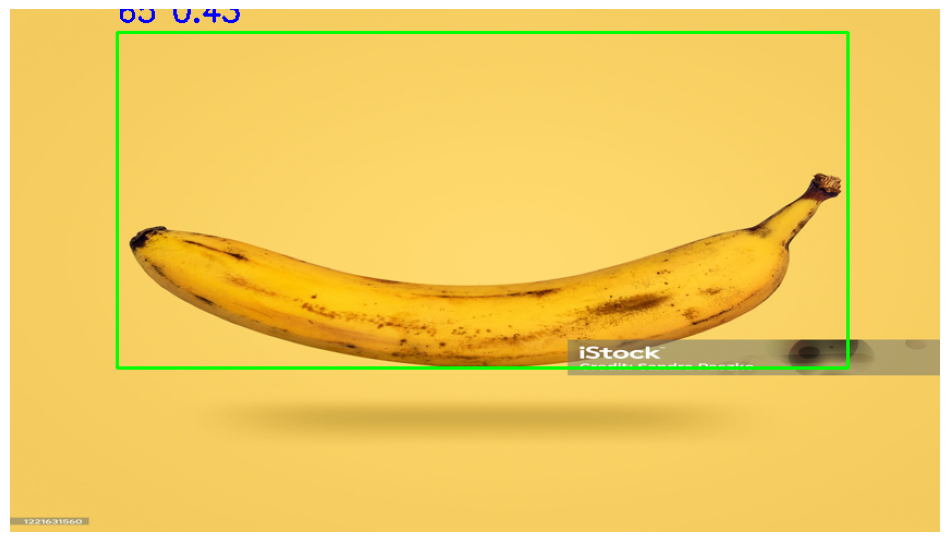

In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from ultralytics import YOLO

# Load the trained YOLOv8 model
model_path = "best_for_freshness.pt"
model = YOLO(model_path)

# Load the input image
input_image_path ="/content/istockphoto-1221631560-2048x2048.jpg"
image = Image.open(input_image_path)

print(image.size)
image = image.resize((854, 480))
print(image.size)


# Perform inference
results = model(image)

# Extract predictions from results
# The results are in the form [boxes, labels, confidences]
boxes = results[0].boxes.xyxy  # Bounding boxes (x1, y1, x2, y2)
labels = results[0].names  # Class names
confidences = results[0].boxes.conf  # Confidence scores
class_ids = results[0].boxes.cls

# Show the output image with bounding boxes
fig, ax = plt.subplots(1, figsize=(12, 9))
image_np = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

def calculate_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1p, y1p, x2p, y2p = box2

    # Calculate intersection area
    inter_area = max(0, min(x2, x2p) - max(x1, x1p)) * max(0, min(y2, y2p) - max(y1, y1p))

    # Calculate union area
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2p - x1p) * (y2p - y1p)

    # IoU = intersection / union
    iou = inter_area / (box1_area + box2_area - inter_area)
    return iou

# Non-Maximum Suppression based on IoU and confidence
filtered_boxes = []
filtered_labels = []
filtered_confidences = []

for i in range(len(boxes)):
    x1, y1, x2, y2 = boxes[i]
    confidence = confidences[i].item()
    label = int(class_ids[i].item())

    # Check IoU with existing boxes in filtered list
    keep = True
    for j in range(len(filtered_boxes)):
        existing_box = filtered_boxes[j]
        iou = calculate_iou([x1, y1, x2, y2], existing_box)
        if iou > 1:
            # If IoU > 0.5, keep only the box with the highest confidence
            if confidence < filtered_confidences[j]:
                keep = False
                break

    if keep:
        filtered_boxes.append([x1, y1, x2, y2])
        filtered_labels.append(labels[label])
        filtered_confidences.append(confidence)

# Show the output image with filtered bounding boxes
# fig, ax = plt.subplots(1, figsize=(12, 9))
image_np = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Draw the filtered bounding boxes with the maximum confidence
for i in range(len(filtered_boxes)):
    x1, y1, x2, y2 = filtered_boxes[i]
    confidence = filtered_confidences[i]
    label = filtered_labels[i]

    # Draw the bounding box
    cv2.rectangle(image_np, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

    # Display the label and confidence score
    cv2.putText(image_np, f"{label} {confidence:.2f}",
                (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)


# Convert image back to RGB and show it
image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



(2048, 2048)
(854, 480)

0: 384x640 1 65, 516.9ms
Speed: 10.3ms preprocess, 516.9ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)


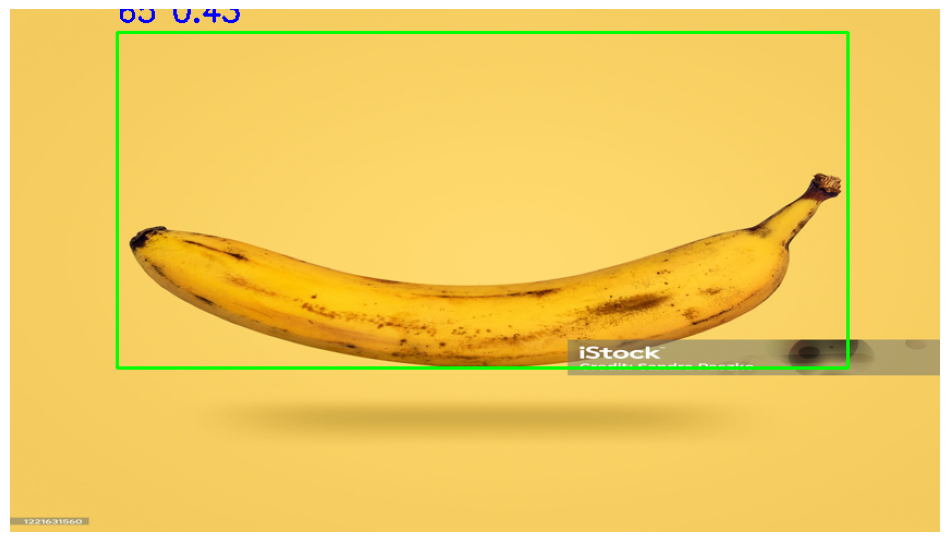

In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from ultralytics import YOLO

# Load the trained YOLOv8 model
model_path = "best_for_freshness.pt"
model = YOLO(model_path)

# Load the input image
input_image_path ="/content/istockphoto-1221631560-2048x2048.jpg"
image = Image.open(input_image_path)

print(image.size)
image = image.resize((854, 480))
print(image.size)


# Perform inference
results = model(image)

# Extract predictions from results
# The results are in the form [boxes, labels, confidences]
boxes = results[0].boxes.xyxy  # Bounding boxes (x1, y1, x2, y2)
labels = results[0].names  # Class names
confidences = results[0].boxes.conf  # Confidence scores
class_ids = results[0].boxes.cls

# Show the output image with bounding boxes
fig, ax = plt.subplots(1, figsize=(12, 9))
image_np = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

def calculate_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1p, y1p, x2p, y2p = box2

    # Calculate intersection area
    inter_area = max(0, min(x2, x2p) - max(x1, x1p)) * max(0, min(y2, y2p) - max(y1, y1p))

    # Calculate union area
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2p - x1p) * (y2p - y1p)

    # IoU = intersection / union
    iou = inter_area / (box1_area + box2_area - inter_area)
    return iou

# Non-Maximum Suppression based on IoU and confidence
filtered_boxes = []
filtered_labels = []
filtered_confidences = []

for i in range(len(boxes)):
    x1, y1, x2, y2 = boxes[i]
    confidence = confidences[i].item()
    label = int(class_ids[i].item())

    # Check IoU with existing boxes in filtered list
    keep = True
    for j in range(len(filtered_boxes)):
        existing_box = filtered_boxes[j]
        iou = calculate_iou([x1, y1, x2, y2], existing_box)
        if iou > 0.5:
            # If IoU > 0.5, keep only the box with the highest confidence
            if confidence < filtered_confidences[j]:
                keep = False
                break

    if keep:
        filtered_boxes.append([x1, y1, x2, y2])
        filtered_labels.append(labels[label])
        filtered_confidences.append(confidence)

# Show the output image with filtered bounding boxes
# fig, ax = plt.subplots(1, figsize=(12, 9))
image_np = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Draw the filtered bounding boxes with the maximum confidence
for i in range(len(filtered_boxes)):
    x1, y1, x2, y2 = filtered_boxes[i]
    confidence = filtered_confidences[i]
    label = filtered_labels[i]

    # Draw the bounding box
    cv2.rectangle(image_np, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

    # Display the label and confidence score
    cv2.putText(image_np, f"{label} {confidence:.2f}",
                (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)


# Convert image back to RGB and show it
image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



In [ ]:
!pip install sahi
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.3/111.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 11.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=e362305416252c997bb61f1aa6253a18429ec855e0ac12ee2b06d23ec8a592a2
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


In [ ]:
# image_path = "/content/istockphoto-1296233110-1024x1024.jpg"
image_save_path = "/content/resized_image.jpg"

input_image_path ="/content/istockphoto-1296233110-1024x1024.jpg"
image = Image.open(input_image_path)

print(image.size)
image = image.resize((854, 480))
print(image.size)

image.save(image_save_path)

!sahi predict \
  --model_path /content/best_for_freshness.pt \
  --slice_width 400 --slice_height 400 --overlap_height_ratio 0.5 --overlap_width_ratio 0.5 \
  --model_confidence_threshold 0.165 \
  --model_type yolov8 \
  --source /content/resized_image.jpg \
  --image_size 640 \
  --export_crop \
  --project /content/cropped_boxes

(1024, 682)
(854, 480)
Performing prediction on 8 slices.
Prediction time is: 2537.48 ms
Performing inference on images: 100% 1/1 [00:02<00:00,  2.59s/it]
Prediction results are successfully exported to /content/cropped_boxes/exp14
